In [2]:
import cv2
import numpy
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('Elaine.tiff')
arr0 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
arr=arr0.copy()

arr1=cv2.imread('index.jpg')
arr1=cv2.cvtColor(arr1, cv2.COLOR_BGR2GRAY)

arr2=cv2.imread('compare.jpg')
arr2=cv2.cvtColor(arr2, cv2.COLOR_BGR2GRAY)

arr3=arr1.copy()

In [4]:
def equi():
    
    f = []
    for i in range(256):
        f.append(0)
    pd = f 
    cdf =f
    rows, columns = arr.shape
    for i in range(rows):
        for j in range(columns):
            f[arr[i][j]]=f[arr[i][j]] + 1  

    for i in range(256):
        pd[i]=f[i]/(rows*columns)
    
    cdf[0]=pd[0]
    for i in range(1,256):
        cdf[i]=(cdf[i-1]+pd[i])

    for i in range(256):
        cdf[i]=round(cdf[i]*255)
    for i in range(rows):
        for j in range(columns):
            arr[i][j]=cdf[arr[i][j]]

    fig=plt.figure(figsize=(10,10))
    
    ax1=fig.add_subplot(2,2,1)
    ax1.hist(arr0.ravel(),bins =256)
    
    ax2=fig.add_subplot(2,2,2)
    ax2.hist(arr.ravel(), bins=256)
    
    ax3=fig.add_subplot(2,2,3)
    ax3.imshow(arr0,cmap='gray')
    
    ax4=fig.add_subplot(2,2,4)
    ax4.imshow(arr, cmap='gray')
    
    plt.show()

                                                                                                                                                                                                                                                                                        # equi()

In [5]:
def match():
    f1 = []
    for i in range(256):
        f1.append(0)
    pd1 = f1 
    cdf1 =f1
    rows1, columns1 = arr1.shape
    for i in range(rows1):
        for j in range(columns1):
            f1[arr1[i][j]]=f1[arr1[i][j]] + 1  

    for i in range(256):
        pd1[i]=f1[i]/(rows1*columns1)
    
    cdf1[0]=pd1[0]
    for i in range(1,256):
        cdf1[i]=(cdf1[i-1]+pd1[i])
        
    f2 = []
    for i in range(256):
        f2.append(0)
    pd2= f2 
    cdf2 =f2
    rows2, columns2 = arr2.shape
    for i in range(rows2):
        for j in range(columns2):
            f2[arr2[i][j]]=f2[arr2[i][j]] + 1  

    for i in range(256):
        pd2[i]=f2[i]/(rows2*columns2)
    
    cdf2[0]=pd2[0]
    for i in range(1,256):
        cdf2[i]=(cdf2[i-1]+pd2[i])

    for i in range(rows2):
        for j in range(columns2):
            for k in range(256):
                if cdf1[arr1[i][j]]<cdf2[k]:
                    arr3[i][j]=k-1
                    break;

    fig=plt.figure(figsize=(15,15))
    
    ax1=fig.add_subplot(2,3,1)
    ax1.hist(arr1.ravel(),bins =256,label="original hist")
    
    ax2=fig.add_subplot(2,3,2)
    ax2.hist(arr2.ravel(), bins=256,label="reference hist")   
    
    ax3=fig.add_subplot(2,3,3)
    ax3.hist(arr3.ravel(), bins=256,label="result hist")
    
    ax4=fig.add_subplot(2,3,4)
    ax4.imshow(arr1,cmap='gray')

    ax5=fig.add_subplot(2,3,5)
    ax5.imshow(arr2,cmap='gray')

    
    ax6=fig.add_subplot(2,3,6)
    ax6.imshow(arr3,cmap='gray')
    plt.subplots_adjust(hspace=-0.15)
        
    plt.show()

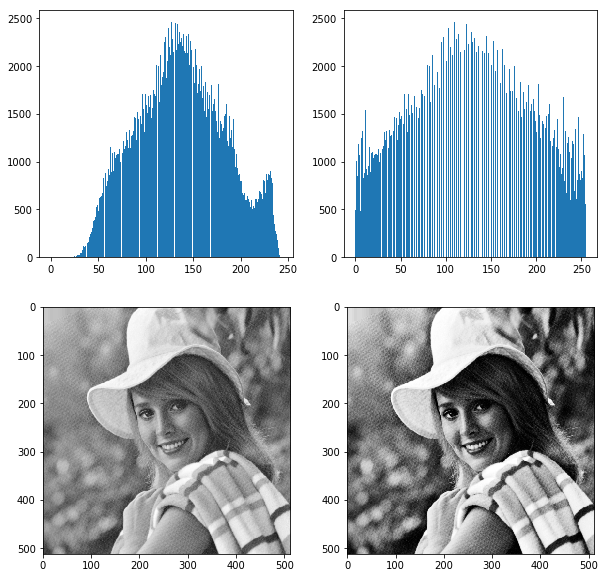

In [6]:
equi()

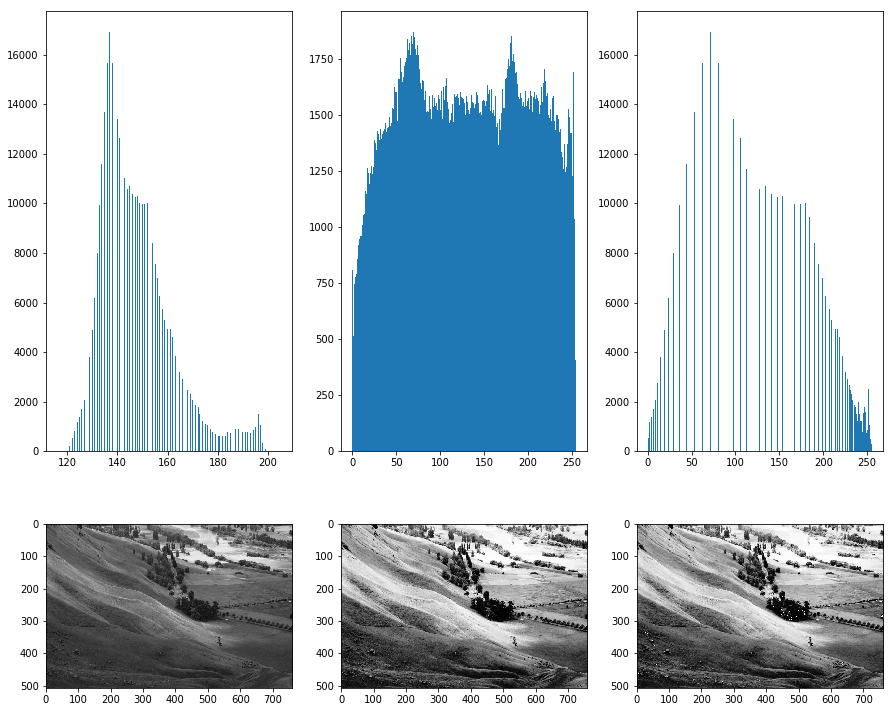

In [18]:
match()